# Task 1: Prediction using Supervised ML

# Author - Rohit Arun Jadhav
(Data Science & Business Analytics Intern at The Spark Foundation (GRIP- May 2021 batch))




  # Title - Predict the percentage of an student based on the number of study                hours using simple linear regression and predict the score if                            a student studies for 9.25 hrs/ day.


Import the required libraries:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("setup complete")


setup complete


Read the dataset 

In [48]:
student_data = pd.read_csv("http://bit.ly/w-data")
print("uploaded successfully")

uploaded successfully


Look at the first 5 rows from the dataset

In [49]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Describe the dataset as :

In [50]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From above description of the data it is represented that minimum hours is 1.10 hr, minimum score is 17% and maximum hours of study is 9.20 hr, maximum score obtained is 95% 

In [51]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let us find the total number of rows and columns in the dataset as (rows, columns) :

In [52]:
student_data.shape

(25, 2)

Now lets find out whether the given dataset contains any null value as:

In [53]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We have observed that the given dataset does not contain any null value.

# Let us now visualize the data as follows:

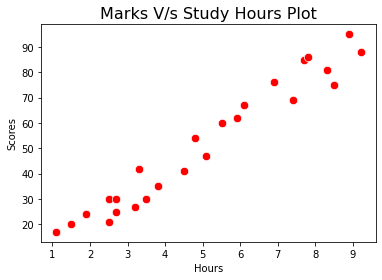

In [54]:
sns.scatterplot(x="Hours", y="Scores",data=student_data,color="red",s=70)
plt.title('Marks V/s Study Hours Plot',size=16)
plt.show()

By Observing the above Scatter Plot, we can conclude that Scores obtained by the students is directly proportional to the Hours they spend for their studies

 Now lets plot a regression line for the confirmation of the correlation

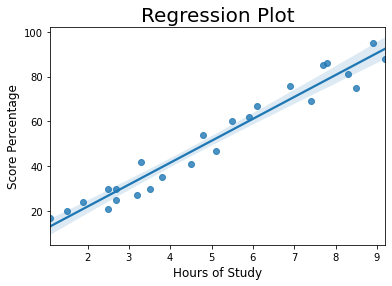

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [55]:
plt.title('Regression Plot',size=20)
sns.regplot(x= 'Hours', y= 'Scores', data=student_data)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('Hours of Study', size=12)
plt.show()
print(student_data.corr())

From the above regression plot we have confirmed that the variables are correlated positively

# Train The Model To Predict the Score

In [56]:
x = student_data.iloc[:, :-1].values   # array of values in "Hours" column
y = student_data.iloc[:, 1].values    # array of values in "Scores" column

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [58]:
regg=LinearRegression()
regg.fit(x_train, y_train)
print("We have trained the Model successfully")

We have trained the Model successfully


In [59]:
y_pred=regg.predict(x_test)
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [60]:
student_data=pd.DataFrame({'Actual': y_test, 'predicted' : y_pred, 'Difference in score' : y_test - y_pred})
student_data

,Actual,predicted,Difference in score
0,20,16.844722,3.155278
1,27,33.745575,-6.745575
2,69,75.500624,-6.500624
3,30,26.786400,3.213600
4,62,60.588106,1.411894
5,35,39.710582,-4.710582
6,24,20.821393,3.178607


In [61]:
print("If a student studies for 9.25 hours/day the predicted score is ",regg.predict([[9.25]]))


If a student studies for 9.25 hours/day the predicted score is  [93.89272889]
